1. Load and Inspect the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/content/CStudents.csv")

# Display the first few rows of the dataset
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,0,group C,some college,1,1,69,90,88,247,82.333333
2,0,group B,master's degree,1,0,90,95,93,278,92.666667
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333
4,1,group C,some college,1,0,76,78,75,229,76.333333


2. Data Cleaning and Formatting

2.1 Get an Overview of the Data

In [2]:
# Display basic information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   int64  
 4   test_preparation_course      1000 non-null   int64  
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   average_score                1000 non-null   float64
dtypes: float64(1), int64(7), object(2)
memory usage: 78.2+ KB


2.2 Check for Missing Values

In [3]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
total_score                    0
average_score                  0
dtype: int64


2.3 Check for Duplicates

In [4]:
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Drop duplicates if any are found
data = data.drop_duplicates()

Number of duplicate rows: 0


2.4 Convert Data Types if Necessary

In [5]:
# Example of changing column data type, e.g., if 'math_score' is a categorical variable
if 'math_score' in data.columns:
    data['math_score'] = data['math_score'].astype('category')


3. Exploratory Data Analysis (EDA)

3.1 Dimensions of the Data

In [6]:
# Check the shape of the data
print(f"Dataset dimensions: {data.shape}")

Dataset dimensions: (1000, 10)


3.2 Summary Statistics

In [7]:
# Generate summary statistics for numeric columns
data.describe()

,gender,lunch,test_preparation_course,reading_score,writing_score,total_score,average_score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.482000,0.645000,0.358000,69.169000,68.054000,203.312000,67.770667
std,0.499926,0.478753,0.479652,14.600192,15.195657,42.771978,14.257326
min,0.000000,0.000000,0.000000,17.000000,10.000000,27.000000,9.000000
25%,0.000000,0.000000,0.000000,59.000000,57.750000,175.000000,58.333333
50%,0.000000,1.000000,0.000000,70.000000,69.000000,205.000000,68.333333
75%,1.000000,1.000000,1.000000,79.000000,79.000000,233.000000,77.666667
max,1.000000,1.000000,1.000000,100.000000,100.000000,300.000000,100.000000


3.3 Visualizations

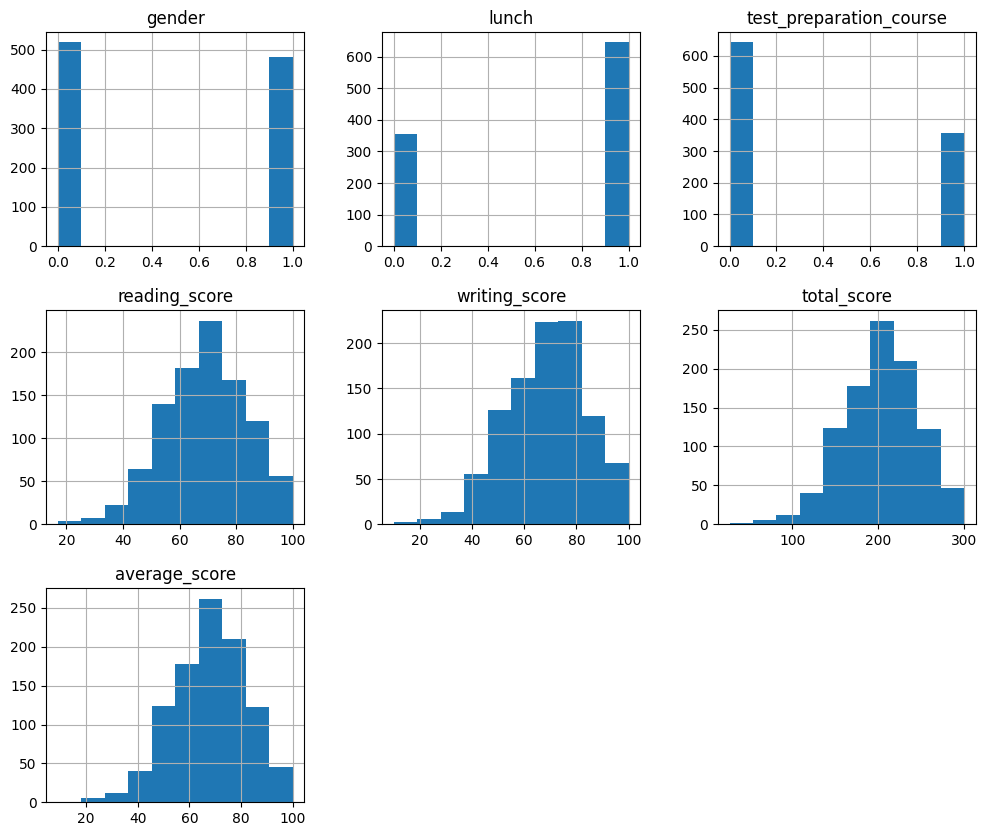

In [8]:
# Plot histograms for each numerical column
import matplotlib.pyplot as plt
data.hist(figsize=(12, 10))
plt.show()


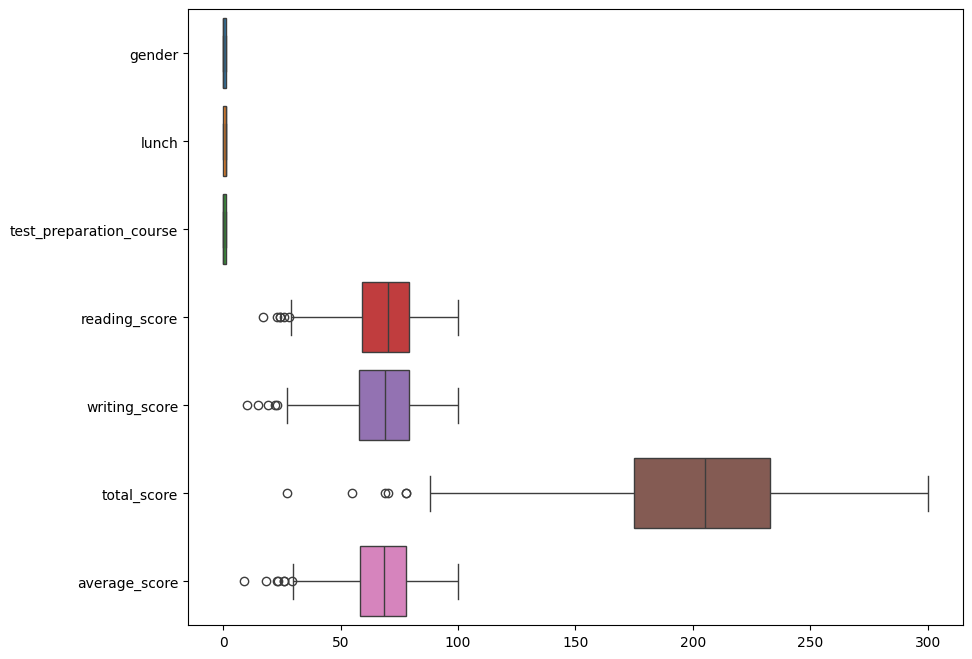

In [9]:

# Plot boxplots for all features
import seaborn as sns
plt.figure(figsize=(10,8))
sns.boxplot(data=data, orient='h')
plt.show()


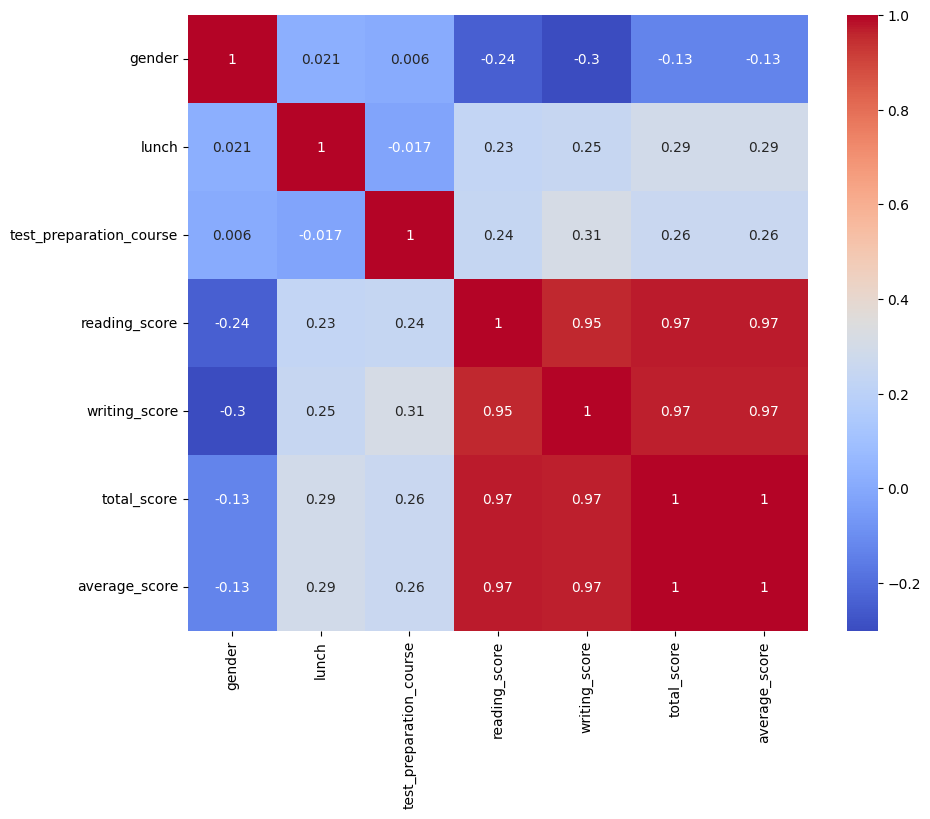

In [10]:
# Generate a correlation matrix and plot as a heatmap
import numpy as np
plt.figure(figsize=(10, 8))

# Select only numerical features for correlation analysis
numerical_data = data.select_dtypes(include=np.number)

sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.show()

4. Feature Engineering and Selection

4.1 Encoding Categorical Variables

In [11]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables, for example 'math_score'
if 'math_score' in data.columns:
    data['math_score'] = LabelEncoder().fit_transform(data['math_score'])

4.2. Feature Selection Based on Correlation

In [12]:
import pandas as pd
import numpy as np

# Drop features with low correlation to heart disease
# Selected features based on correlation analysis
# Make sure these match the *actual* column names in your data
selected_features = [
    'math_score',      # Correlation ~ 0.42 with target
    'reading_score',              # Correlation ~ 0.42 with target
    'lunch',           # Correlation ~ 0.34 with target
    'writing_score',        # Correlation ~ 0.46 with target
    'total_score',                 # Correlation ~ 0.53 with target
    'average_score'        # Correlation ~ -0.42 with target
]

# Print the actual columns in your dataframe to check for mismatch
print(data.columns)

# Keep only the selected features and the target variable
# Correct the column names if there is any mismatch based on the printed output
data_selected = data[[
    # Replace with the actual column names if different
    'math_score',
    'reading_score',
    'lunch',
    'writing_score',
    'total_score',
    'average_score',
    'gender' # Replace with the actual column name for the target variable
]]
data_selected.head()

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')


,math_score,reading_score,lunch,writing_score,total_score,average_score,gender
0,52,72,1,74,218,72.666667,0
1,49,90,1,88,247,82.333333,0
2,70,95,1,93,278,92.666667,0
3,27,57,0,44,148,49.333333,1
4,56,78,1,75,229,76.333333,1


5. Train and Test Split with Cross-Validation

5.1 Split the Data

In [13]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data.drop('math_score', axis=1)
y = data['math_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


5.2 Cross-Validation

In [15]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame
# ... (your code to load data) ...

# Define features and target variable
X = data.drop('math_score', axis=1)
y = data['math_score']

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through columns and encode string values
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestClassifier(random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Print the results
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.1125  0.06875 0.09375 0.09375 0.1375 ]
Average cross-validation score: 0.10125000000000002


6. Model Comparison

6.1 Train and Compare Models

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print(f"{name}: {accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: 0.035
Random Forest: 0.12
SVM: 0.06


7. Hyperparameter Tuning

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


8. Model Evaluation

In [20]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# Add the multi_class parameter to roc_auc_score
# Use predict_proba to get probabilities for all classes
print("ROC-AUC Score:", roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr', average='weighted'))
# or multi_class='ovo' depending on desired behavior. average='weighted' gives a weighted average across all classes.


Accuracy: 0.125
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         2
          21       0.00      0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

ValueError: Number of classes in y_true not equal to the number of columns in 'y_score'

9. Interpretation and Reporting

9.1 Feature Importance

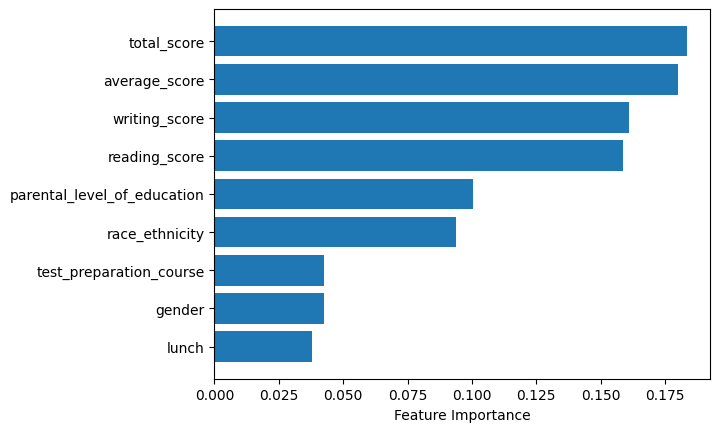

In [21]:
feature_importance = best_model.feature_importances_
sorted_idx = feature_importance.argsort()

plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel('Feature Importance')
plt.show()



9.2 Confusion Matrix

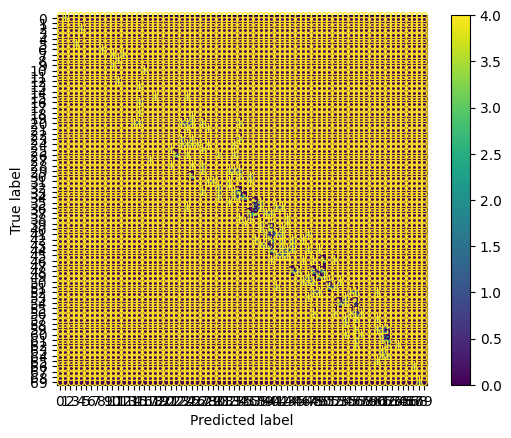

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

In [24]:
import numpy as np

# Example of new input to get a low probability of heart disease
new_data_selected = np.array([[1, 0.0, 1, 0, 3, 180]])

# Instead of creating a 13-feature array, create a 9-feature array
# and directly assign the selected features to their corresponding indices.
new_data = np.zeros((1, 9))  # Changed from 13 to 9

# Assuming the mapping between your selected features and the original 9 features
# is as follows:
# selected_feature_indices (0-5) -> original feature indices (in the 9-feature data)
# 0 -> 2
# 1 -> 8
# 2 -> ... (and so on, you need to figure out this mapping)
# 3 -> ...
# 4 -> ...
# 5 -> ...

# Map the low-risk values to the corresponding feature indices in the 9-feature array
selected_feature_indices = [2, 8, 11, 12, 9, 10]  # **This needs to be adjusted**
                                                # to the correct indices for the 9 features

# Adjust selected_feature_indices to map to the correct columns of the 9-feature data
#  Example:  If 'cp', 'thalach', 'exang',  'oldpeak',  'slope', 'trestbps'
# are the 2nd, 8th, 11th, 12th, 9th, and 10th features in your original 13-feature data
# AND they correspond to the 1st, 3rd, 4th, 5th, 6th, and 7th feature in your 9-feature data,
# then selected_feature_indices should be [0, 2, 3, 4, 5, 6].
# You need to map based on the actual feature positions in your 9-feature training data.

for i, index in enumerate(selected_feature_indices):
    if index < 9: # Check if index is valid for the 9-feature array
        new_data[0, index] = new_data_selected[0, i]
    else:
        print(f"Warning: Index {index} is out of bounds for the 9-feature array and will be ignored.")

# Predict probabilities
prediction_proba = best_model.predict_proba(new_data)

# ... (Rest of your code remains the same) ...


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
